In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

In [3]:
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls

In [4]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [5]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [6]:
df.shape

(8599212, 7)

In [7]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [9]:
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.shape

(8235082, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [12]:
df['Year'] = pd.to_datetime(df['dt']).dt.year
Year = np.unique(df['dt'].apply(lambda x: x[:4]))

In [13]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744


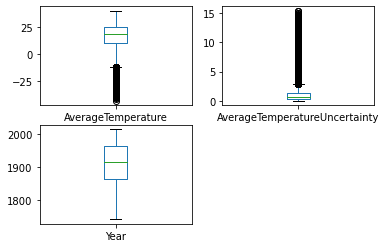

In [14]:
df.plot(kind = 'box', subplots = True , layout=(2,2) , sharex = False , sharey = False)
plt.show()

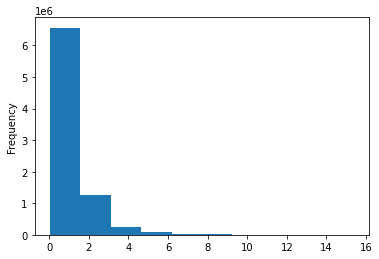

In [15]:
df['AverageTemperatureUncertainty'].plot.hist()

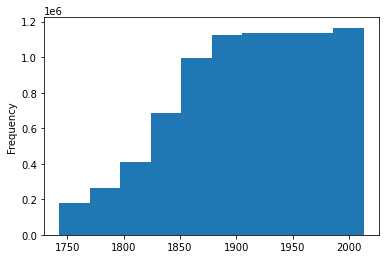

In [16]:
df['Year'].plot.hist()

In [17]:
yearavg = df.groupby('Year')['AverageTemperature'].mean().reset_index()

#### A Plot to show the temperature trends from 175-2013 around the world

In [18]:
yearavg.iplot(kind='scatter',x='Year',y='AverageTemperature', 
            title='Temperature Trend around 1750 - 2013',xTitle='Year',yTitle='Temperature')

In [19]:
countries = np.unique(df['Country'])
country = df.groupby('Country')['AverageTemperature'].mean().reset_index()

#### Countries arranged on the Basis of Average Land Temperature.
##### We find Dijbouti with the highest Average land Temperature and Mongolia with the Lowest.

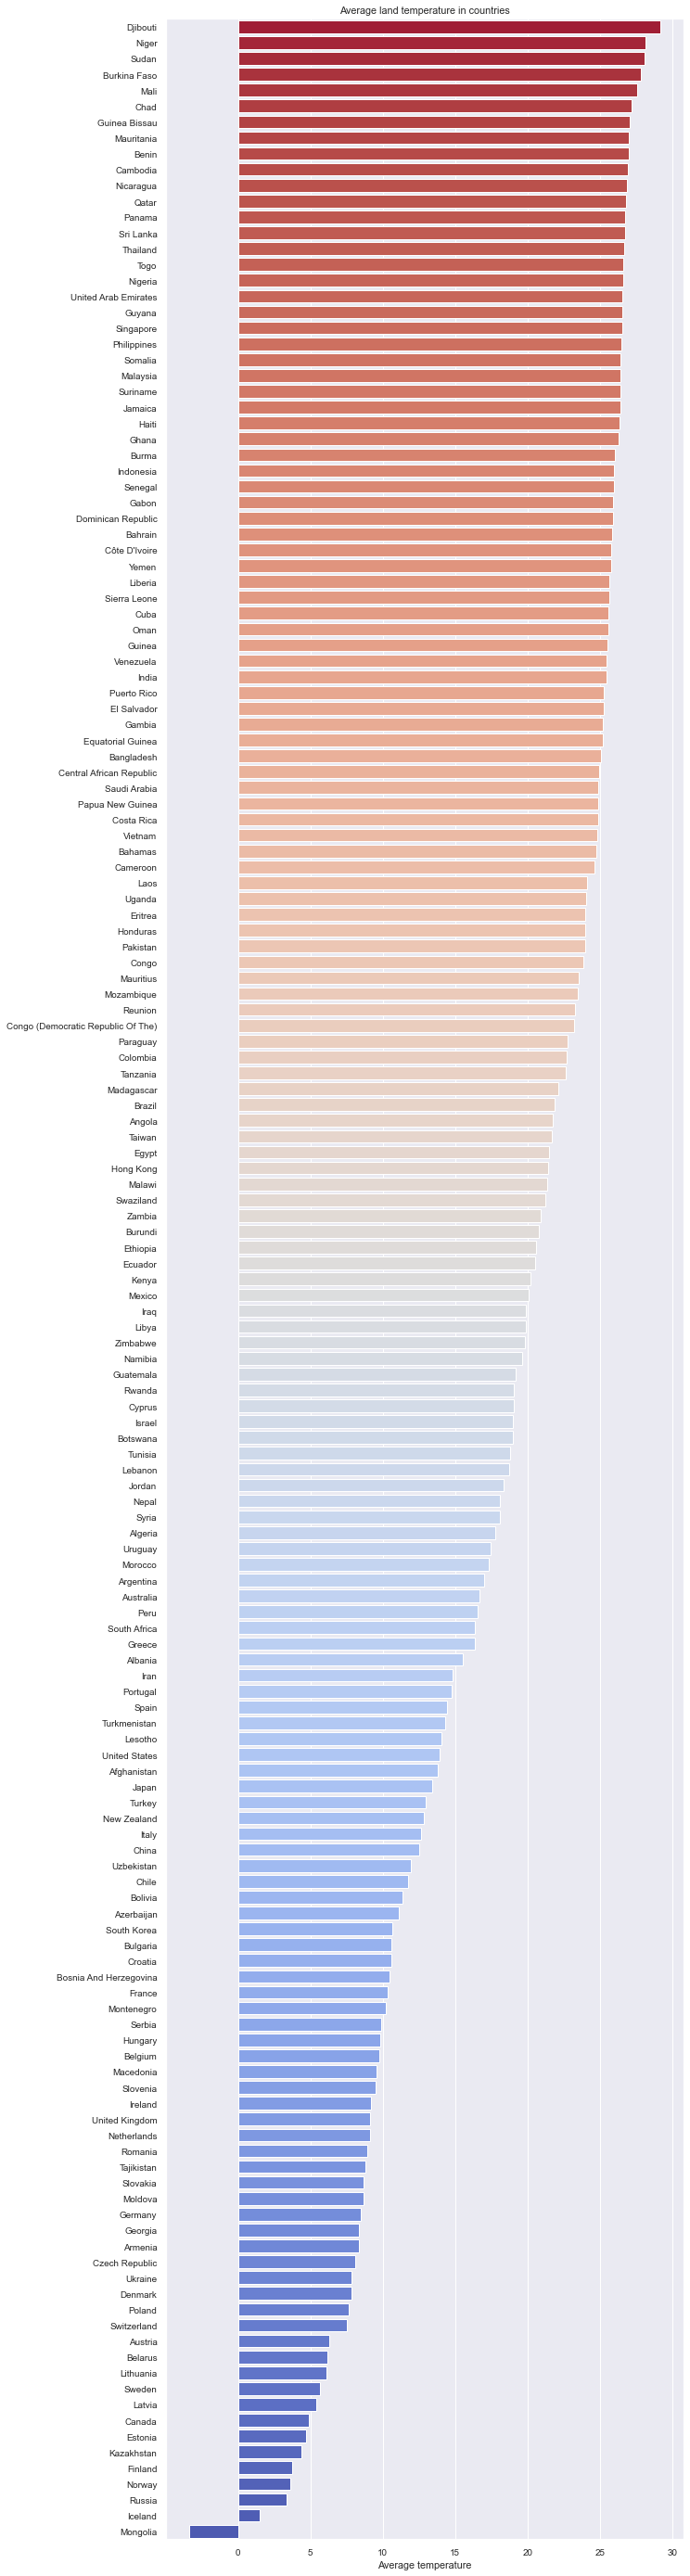

In [20]:
mean_temp_bar,countries_bar=(list(x) for x in zip(*sorted(zip(country['AverageTemperature'],country['Country']),reverse=True)))
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(10, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

#### A plotly Chropleth Globe Graph which Locates the countries and their Average Land Temperature

In [21]:
data = [ dict(
        type = 'choropleth',
        locations = country['Country'],
        z = country['AverageTemperature'],
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Average Temperature, °C')
            )
       ]

layout = dict(
    title = 'Average Land Temperature',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [23]:
global_temp = df[['dt', 'AverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())

#### This is the plot which tells the Average land Temperature around the world during 4 different Seasons ie Summer, Winter, Autumn and Spring.

##### We find that with the increase of Global warming over the Years, Average Temperature of Summer, Spring and Autumn got a Little higher but the Winter Season was highly Affected with a high Average Temperature Increase.

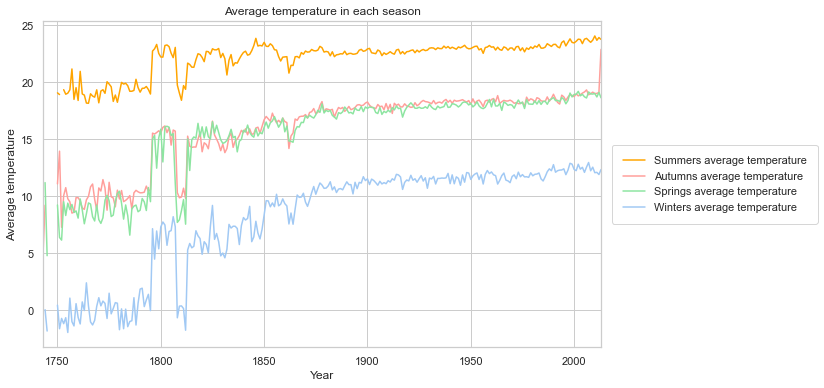

In [24]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

#### A Plot to show the temperature trends from 1750-2013 in India

In [25]:
#Temperature Trend in India
india = df[df['Country']=='India']
india['Year'] = pd.to_datetime(india['dt']).dt.year

new_india = india.groupby('Year')['AverageTemperature'].mean().reset_index()
new_india.iplot(kind='scatter', x='Year', y='AverageTemperature', title='Temperature trend in India',
               xTitle='Year', yTitle='Temperature')

#### We can infer that though there was an increase in Global Warming over the years, Average Land Temperature around the Country did not got much variation.

In [26]:
df_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
df_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [27]:
state = df_state[df_state['Country']=='India']
state = state.groupby('State')['AverageTemperature'].mean().reset_index()
state.sort_values('AverageTemperature',inplace=True,)

In [28]:
#Coolest States
state.head()

,State,AverageTemperature
28,Sikkim,3.149101
14,Jammu And Kashmir,3.204062
13,Himachal Pradesh,9.098241
5,Chandigarh,13.381667
2,Arunachal Pradesh,13.795670


In [29]:
#Hotest States
state.tail()

,State,AverageTemperature
17,Kerala,26.319626
29,Tamil Nadu,26.667812
1,Andhra Pradesh,27.090003
0,Andaman And Nicobar,27.231677
25,Puducherry,27.266897


In [30]:
state = state[:10]
state.iplot(kind='bar', x='State', y='AverageTemperature', title='Top 10 Coolest States of India',
           xTitle='State', yTitle='Temperature', color='deepskyblue')

#### We can See that In India, Sikkim is the coolest state followed by J&k and Himachal Pradesh 

In [31]:
state = df_state[df_state['Country']=='India']
state = state.groupby('State')['AverageTemperature'].mean().reset_index()
state.sort_values('AverageTemperature',inplace=True, ascending=False)
state = state[:10]
state.iplot(kind='bar', x='State', y='AverageTemperature', title='Top 10 Hotest States of India',
           xTitle='State', yTitle='Temperature')

#### We can See that in India, Puducherry is the hottest followed by Andaman and Andhra Pradesh.